# FEATURE ENGINEERING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import CSV File

In [12]:
df = pd.read_csv('user_data_train_clean_feat_create.csv', sep=';')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   uid                                           40717 non-null  object 
 1   is_scammer                                    40717 non-null  int64  
 2   trx_date                                      40717 non-null  int64  
 3   report_date                                   40717 non-null  int64  
 4   registereddate                                40717 non-null  int64  
 5   birthday                                      40717 non-null  int64  
 6   is_verified                                   40717 non-null  int64  
 7   aqc_freq_prepaid_mobile                       40717 non-null  int64  
 8   aqc_mean_prepaid_mobile_amount                40717 non-null  float64
 9   aqc_freq_topup                                40717 non-null 

#### Plot Distribution

<AxesSubplot:xlabel='birthday', ylabel='Count'>

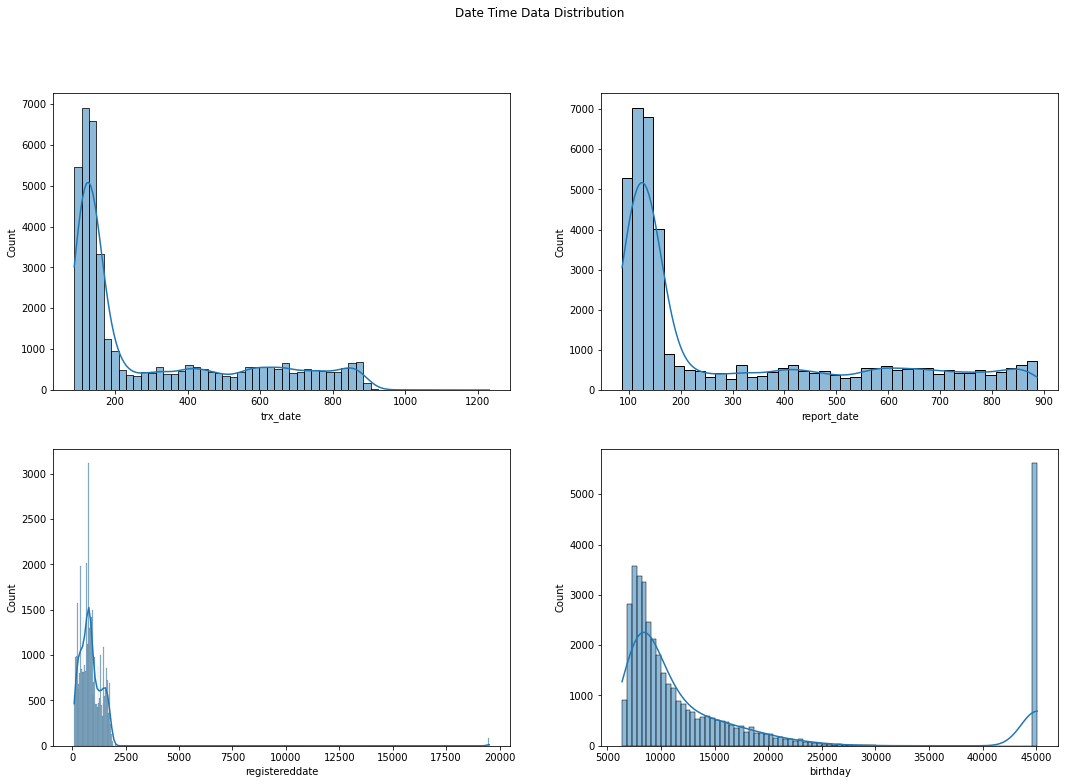

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

fig.suptitle('Date Time Data Distribution')

sns.histplot(ax=axes[0, 0], data=df['trx_date'], kde=True)
sns.histplot(ax=axes[0, 1], data=df['report_date'], kde=True)
sns.histplot(ax=axes[1, 0], data=df['registereddate'], kde=True)
sns.histplot(ax=axes[1, 1], data=df['birthday'], kde=True)

In [23]:
df.columns[7]

'aqc_freq_prepaid_mobile'

MemoryError: 

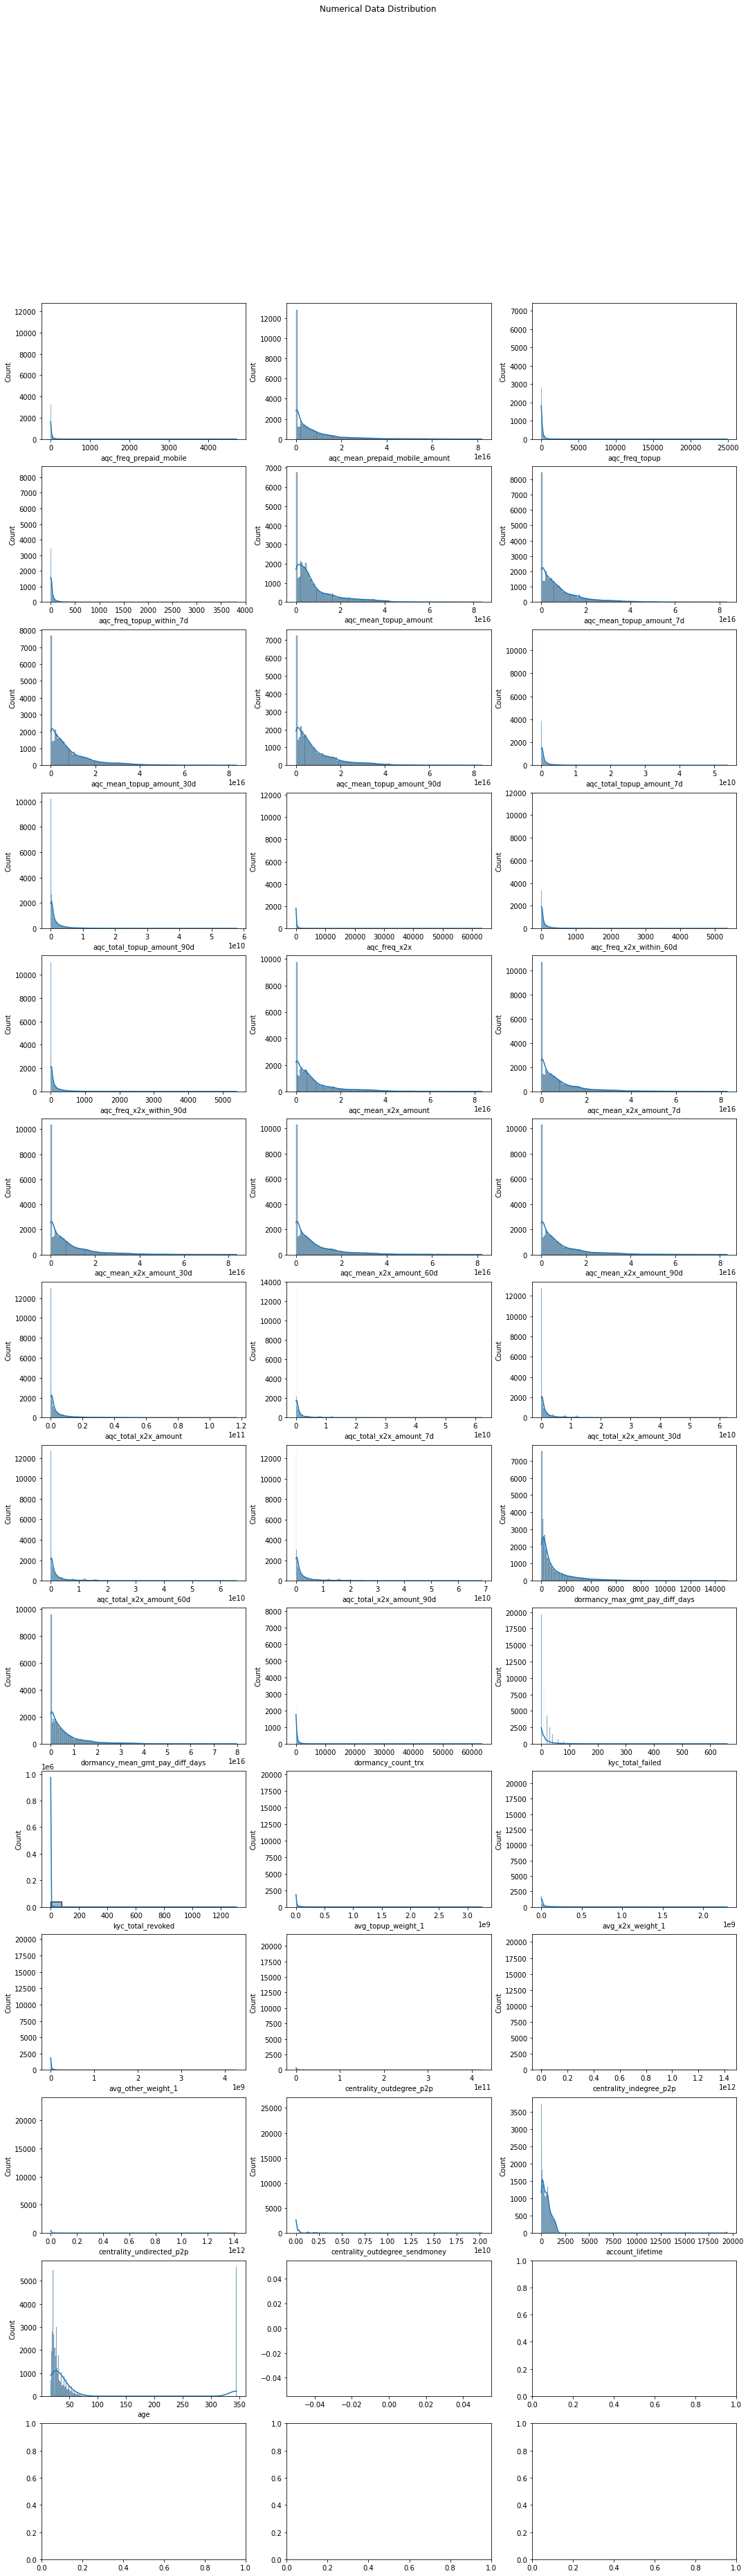

In [25]:
fig, axes = plt.subplots(14, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution")

num_col = 7
for i in range(0,14):
    for j in range(0,3):
        sns.histplot(ax=axes[i, j], data=df[df.columns[num_col]], kde=True)
        num_col += 1

In [26]:
df1 = df.copy()

### Feature Clipping for Extreme Outliers
#### Promote a more Gaussian Distribution

[Text(0.5, 1.0, 'After')]

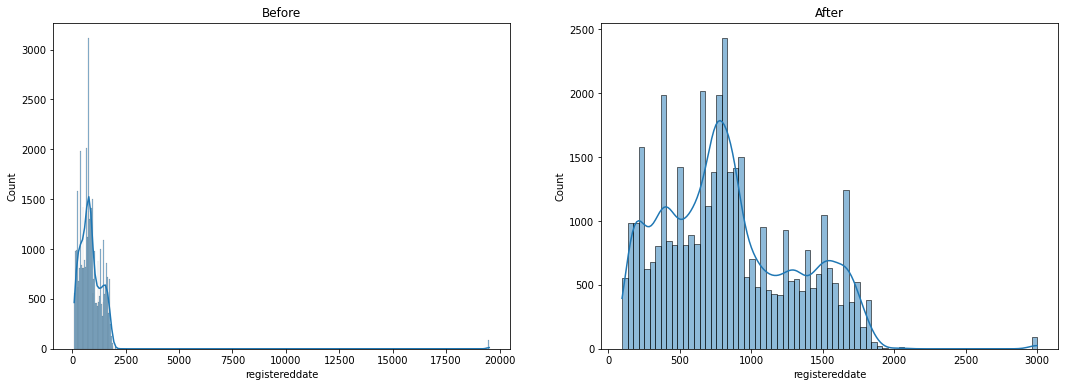

In [27]:
# Clipping 'registereddate' to (16000, 19360)
df1['registereddate'] = df1['registereddate'].clip(0, 3000)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['registereddate'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['registereddate'], kde=True).set(title='After')

[Text(0.5, 1.0, 'After')]

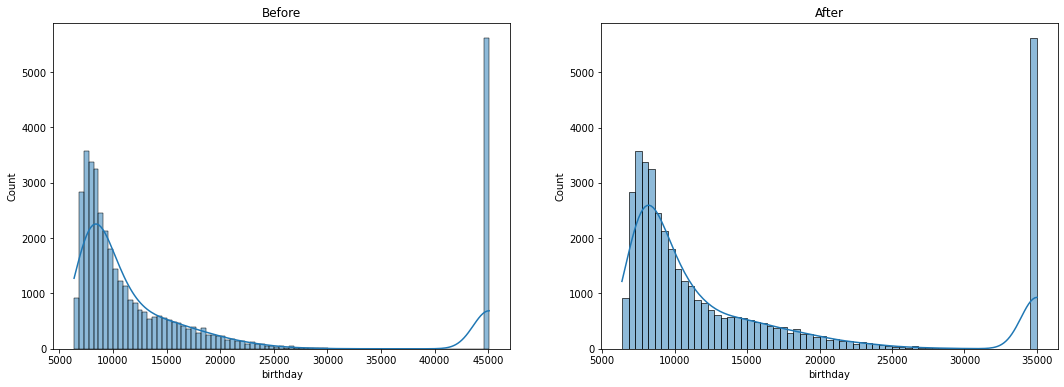

In [28]:
# Clipping 'birthday' to (-15000, 13149)
df1['birthday'] = df1['birthday'].clip(0, 35000)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['birthday'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['birthday'], kde=True).set(title='After')

[Text(0.5, 1.0, 'After')]

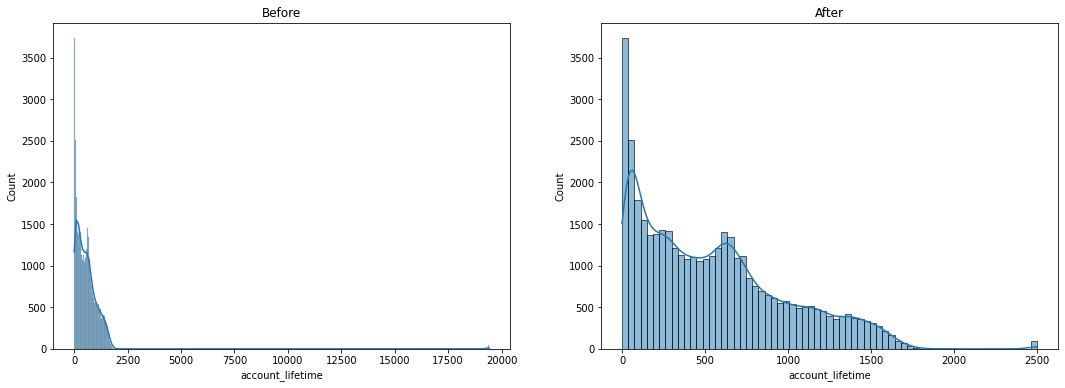

In [30]:
# Clipping 'account_lifetime' to (0, 3000)
df1['account_lifetime'] = df1['account_lifetime'].clip(0, 2500)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['account_lifetime'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['account_lifetime'], kde=True).set(title='After')

[Text(0.5, 1.0, 'After')]

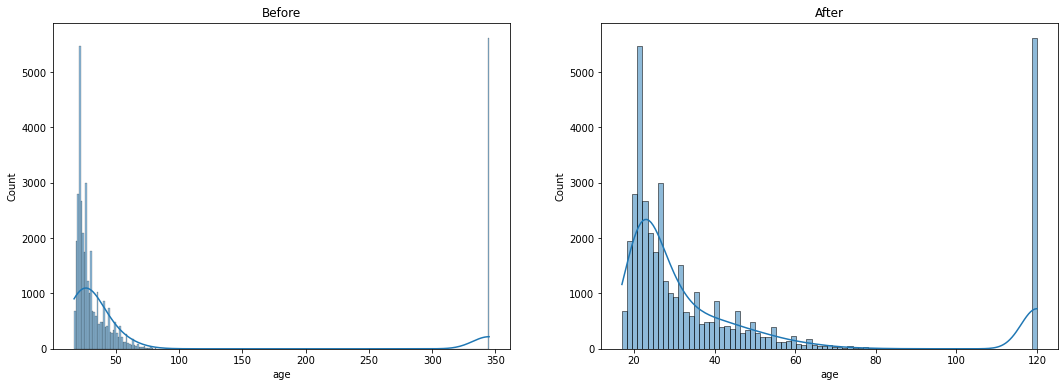

In [31]:
# Clipping 'age' to (0, 120)
df1['age'] = df1['age'].clip(0, 120)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['age'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['age'], kde=True).set(title='After')

In [45]:
# Clipping Other Numerical Data to .99th quantile
for i in range(7, 42):
    print(df1.columns[i] + " : " + str(int(df1[df1.columns[i]].quantile(.99))))
    df1[df1.columns[i]] = df1[df1.columns[i]].clip(0, int(df1[df1.columns[i]].quantile(.99)))

aqc_freq_prepaid_mobile : 257
aqc_mean_prepaid_mobile_amount : 50783999999999648
aqc_freq_topup : 1011
aqc_freq_topup_within_7d : 428
aqc_mean_topup_amount : 45983999999999648
aqc_mean_topup_amount_7d : 46500000000000000
aqc_mean_topup_amount_30d : 45600000000000000
aqc_mean_topup_amount_90d : 44700000000000000
aqc_total_topup_amount_7d : 13679930651
aqc_total_topup_amount_90d : 15909851479
aqc_freq_x2x : 1985
aqc_freq_x2x_within_60d : 823
aqc_freq_x2x_within_90d : 1068
aqc_mean_x2x_amount : 47383999999999648
aqc_mean_x2x_amount_7d : 45883999999999648
aqc_mean_x2x_amount_30d : 44500000000000000
aqc_mean_x2x_amount_60d : 43983999999999648
aqc_mean_x2x_amount_90d : 46183999999999648
aqc_total_x2x_amount : 42497383667
aqc_total_x2x_amount_7d : 15777803939
aqc_total_x2x_amount_30d : 16245682927
aqc_total_x2x_amount_60d : 19377877679
aqc_total_x2x_amount_90d : 20740281483
dormancy_max_gmt_pay_diff_days : 7790
dormancy_mean_gmt_pay_diff_days : 37100000000000000
dormancy_count_trx : 2978
kyc_

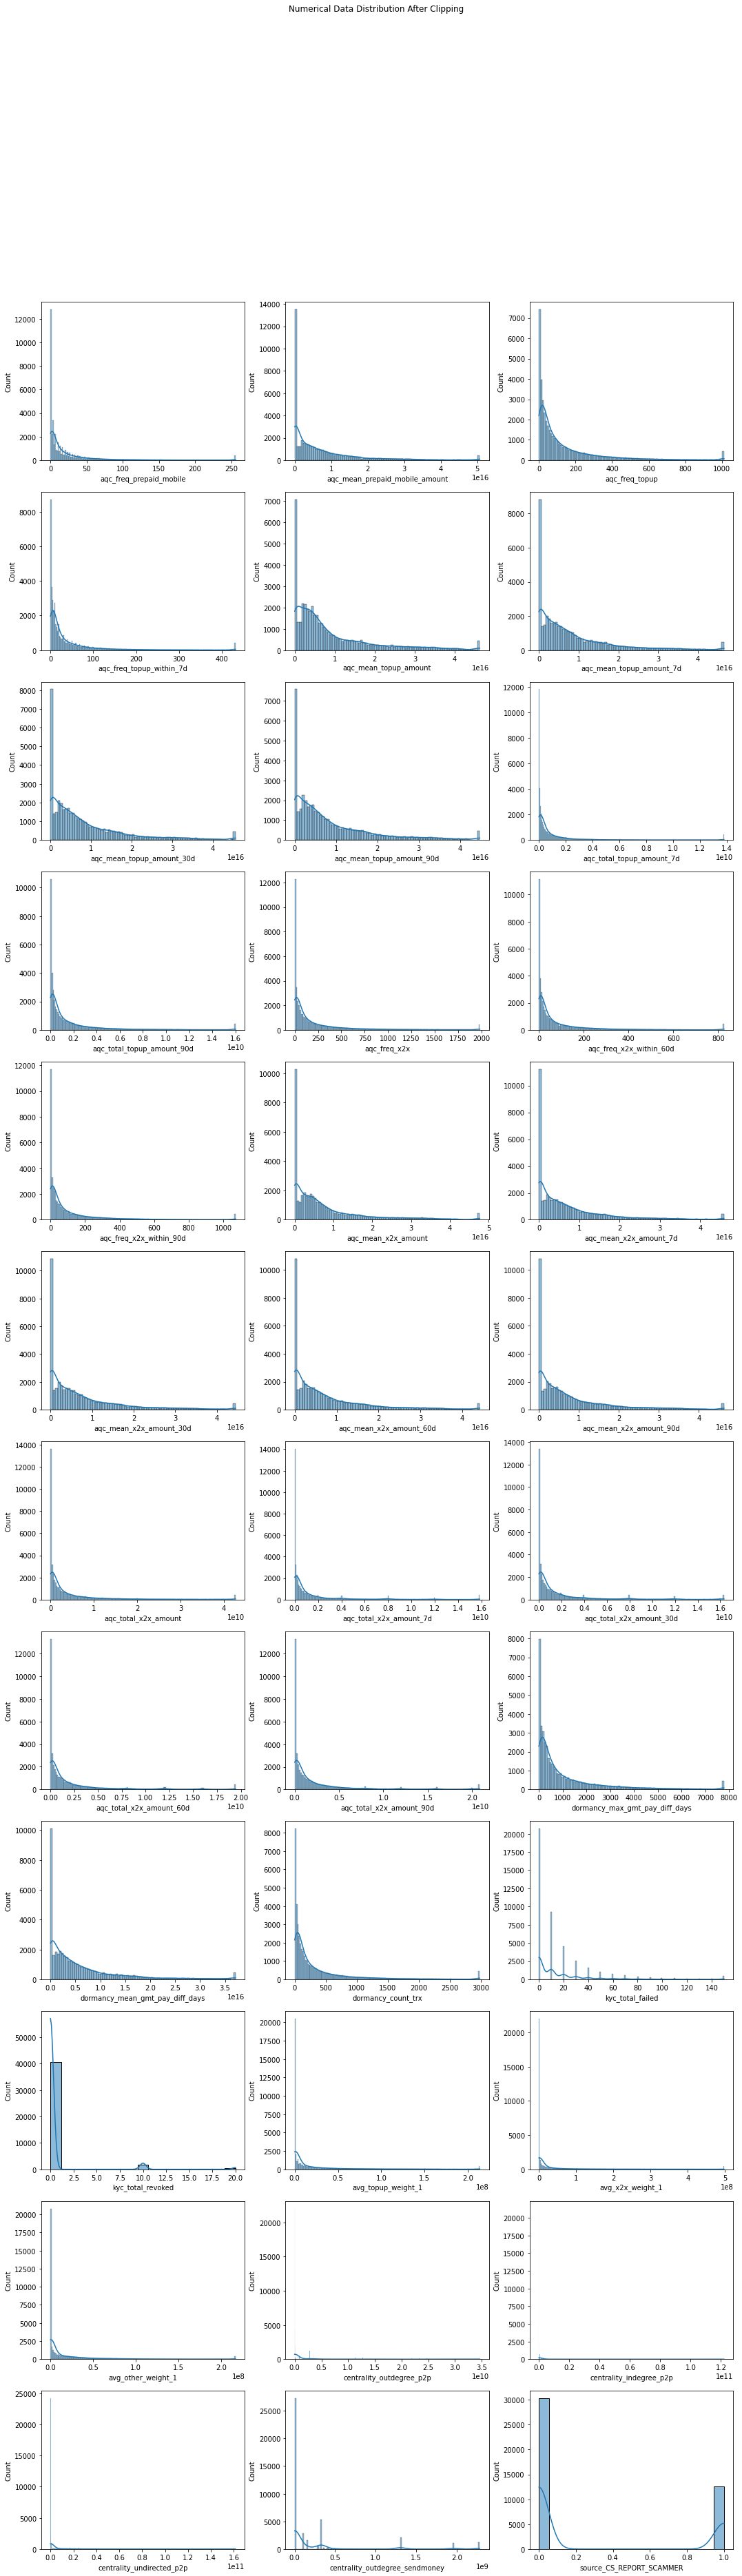

In [115]:
# After Clipping

fig, axes = plt.subplots(12, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution After Clipping")

n = 6
for i in range(0,12):
    for j in range(0,3):
        sns.histplot(ax=axes[i, j], data=df1[df1.columns[n]], kde=True)
        n += 1

### Normalisation

In [52]:
df2 = df1.copy()

<AxesSubplot:xlabel='birthday', ylabel='Count'>

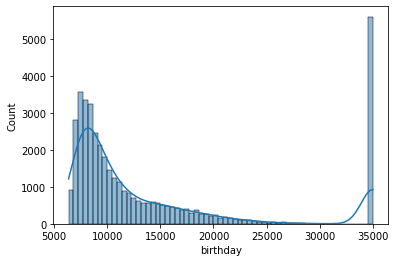

In [53]:
sns.histplot(df1['birthday'], kde=True)

In [55]:
df2.to_csv("user_data_ftcr_cleanclip_eda.csv", index=False, sep=';')

In [46]:
# Min-max Normalisation for Every Non-Binary Features
# X_scaled = (X - X_min) / (X_max - X_min)
for i in range (2, 6):
    df2[df2.columns[i]] = (df1[df1.columns[i]] - df1[df1.columns[i]].min()) / (df1[df1.columns[i]].max() - df1[df1.columns[i]].min())

for i in range (7, 42):
    df2[df2.columns[i]] = (df1[df1.columns[i]] - df1[df1.columns[i]].min()) / (df1[df1.columns[i]].max() - df1[df1.columns[i]].min())

In [47]:
df2.to_csv("user_data_clip99_minmax.csv", sep=';')

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   uid                                           40717 non-null  object 
 1   is_scammer                                    40717 non-null  int64  
 2   trx_date                                      40717 non-null  int64  
 3   report_date                                   40717 non-null  int64  
 4   registereddate                                40717 non-null  int64  
 5   birthday                                      40717 non-null  int64  
 6   is_verified                                   40717 non-null  int64  
 7   aqc_freq_prepaid_mobile                       40717 non-null  int64  
 8   aqc_mean_prepaid_mobile_amount                40717 non-null  float64
 9   aqc_freq_topup                                40717 non-null 

### Check Correlation after Normalisation

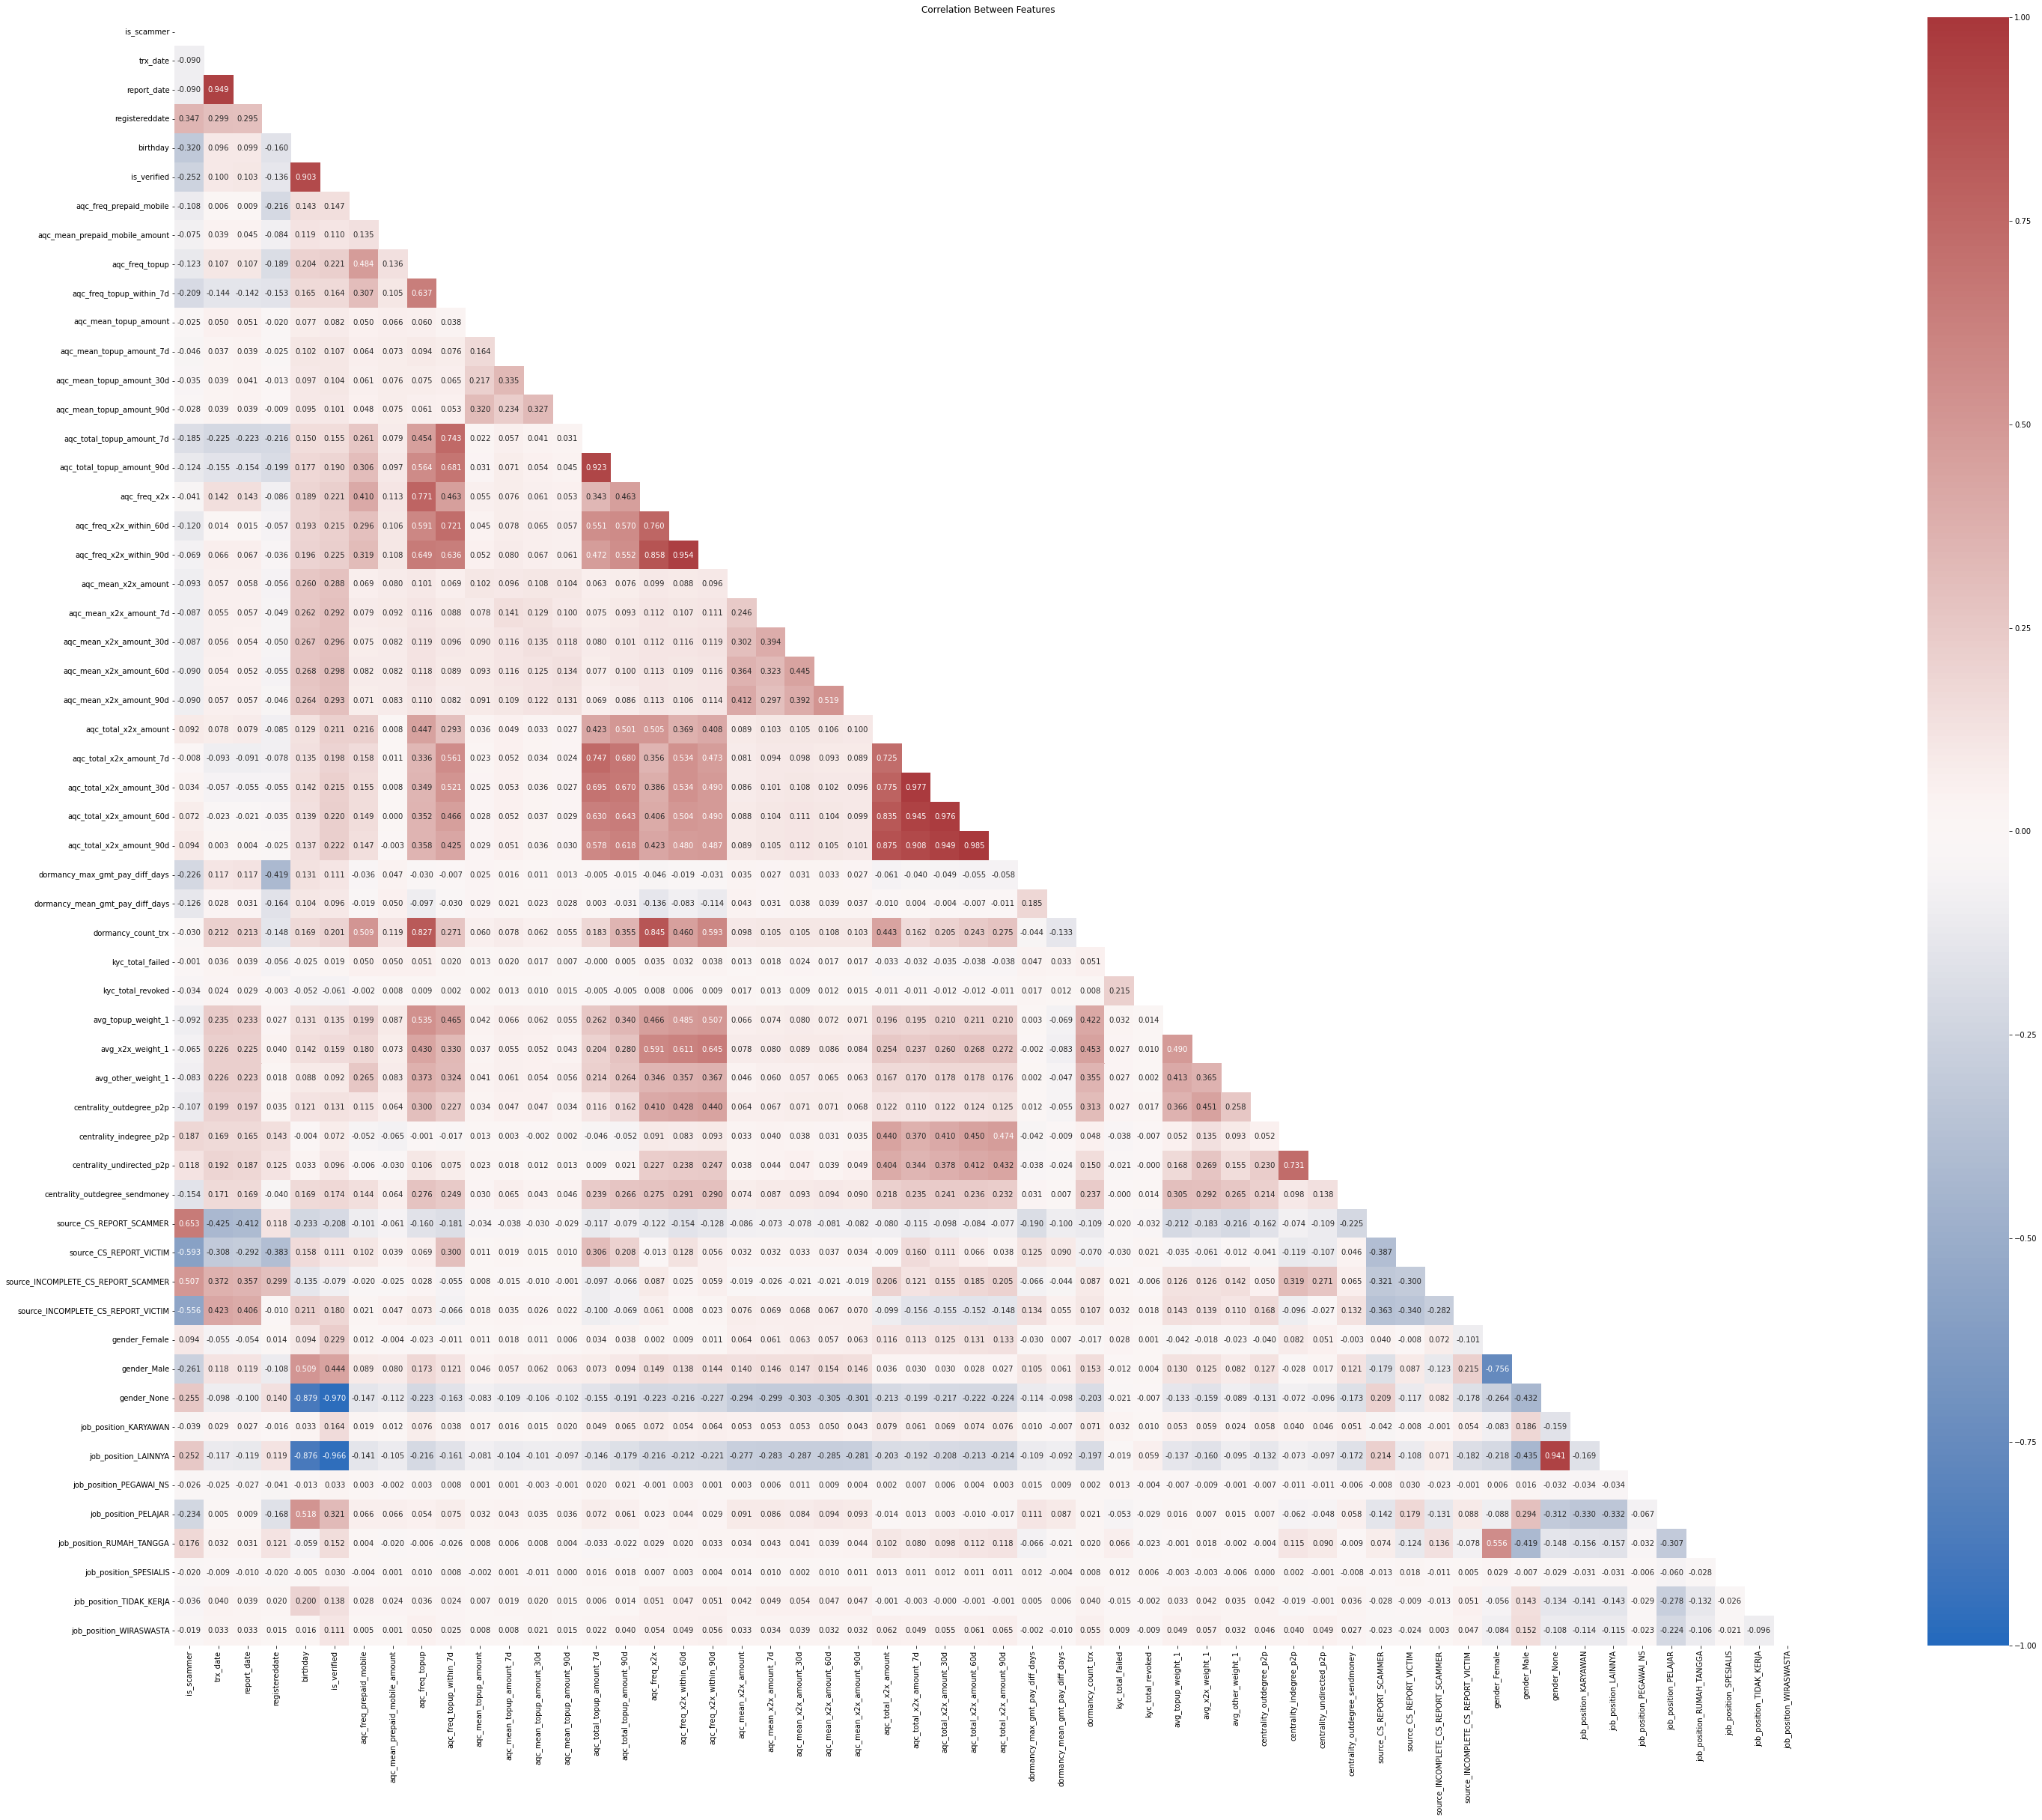

In [49]:
# Check Correlation of Features, then Make Relational Map
corr_column = df2.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df2[corr_column].corr(), dtype=np.bool))

sns.heatmap(df2[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

In [50]:
# Another Visual Representation
score_corr = df2[corr_column].corr()
score_corr.style.background_gradient(cmap='vlag')

### Update: Drop Source Collumns

In [2]:
df = pd.read_csv("user_data_clip99_minmax.csv", sep=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           40717 non-null  int64  
 1   is_scammer                           40717 non-null  int64  
 2   trx_date                             40717 non-null  float64
 3   report_date                          40717 non-null  float64
 4   registereddate                       40717 non-null  float64
 5   birthday                             40717 non-null  float64
 6   is_verified                          40717 non-null  int64  
 7   aqc_freq_prepaid_mobile              40717 non-null  float64
 8   aqc_mean_prepaid_mobile_amount       40717 non-null  float64
 9   aqc_freq_topup                       40717 non-null  float64
 10  aqc_freq_topup_within_7d             40717 non-null  float64
 11  aqc_mean_topup_amount       

In [12]:
df_drop1 = df.drop(columns=df.columns[42:46])

In [13]:
df_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       40717 non-null  int64  
 1   is_scammer                       40717 non-null  int64  
 2   trx_date                         40717 non-null  float64
 3   report_date                      40717 non-null  float64
 4   registereddate                   40717 non-null  float64
 5   birthday                         40717 non-null  float64
 6   is_verified                      40717 non-null  int64  
 7   aqc_freq_prepaid_mobile          40717 non-null  float64
 8   aqc_mean_prepaid_mobile_amount   40717 non-null  float64
 9   aqc_freq_topup                   40717 non-null  float64
 10  aqc_freq_topup_within_7d         40717 non-null  float64
 11  aqc_mean_topup_amount            40717 non-null  float64
 12  aqc_mean_topup_amo

In [14]:
df_drop1.to_csv("user_data_source_dropped.csv", sep=';')